In [1]:
# Import necessary libraries



import numpy as np

import pandas as pd

import matplotlib.pyplot as plt



from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report



import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load the dataset

train_data = pd.read_csv('fraudTrain.csv')

test_data = pd.read_csv('fraudTest.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
# Check for null values

train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
train_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [7]:
# Check for null values

test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
test_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [9]:
# Combining both training & testing data

data = pd.concat([train_data,test_data])

In [10]:
data.shape

(1852394, 23)

In [11]:
# Let us check how each feature is correlated with the target feature



corr_result = {}



for col in data.columns:

    if data[col].dtype != 'object' and col != 'is_fraud':

        corr = data[col].corr(data['is_fraud'])

        corr_result[col] = corr

        

corr_result

{'Unnamed: 0': 0.0005238292595403499,
 'cc_num': -0.0011247864091594529,
 'amt': 0.2093078472297218,
 'zip': -0.002190364119647357,
 'lat': 0.002903941085080629,
 'long': 0.001021760633849491,
 'city_pop': 0.00032519441062587565,
 'unix_time': -0.013328789485515039,
 'merch_lat': 0.0027779924133890144,
 'merch_long': 0.0009994134859691135}

In [12]:
# Consider only columns necessary for prediction

data.drop(columns=['Unnamed: 0','trans_date_trans_time','first','last','gender','street','job','dob','trans_num'],inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   merchant    object 
 2   category    object 
 3   amt         float64
 4   city        object 
 5   state       object 
 6   zip         int64  
 7   lat         float64
 8   long        float64
 9   city_pop    int64  
 10  unix_time   int64  
 11  merch_lat   float64
 12  merch_long  float64
 13  is_fraud    int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 212.0+ MB


In [14]:
# Check class distribution

data['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

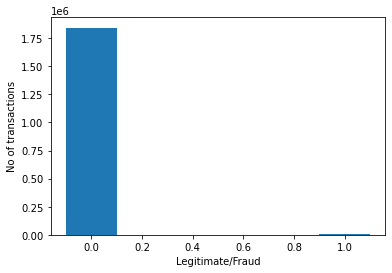

In [15]:
plt.bar(data['is_fraud'].unique(),data['is_fraud'].value_counts(),width = 0.2)

plt.xlabel('Legitimate/Fraud')

plt.ylabel('No of transactions')

plt.show()

#### There are very few fraud transactions. If we train the model using this data, it will lead to overfitting. Hence, let us consider the same number of legitimate transactions and train the model

In [16]:
# Separate fraud & legitimate transactions

legitimate = data[data['is_fraud'] == 0]

fraud = data[data['is_fraud'] == 1]

In [17]:
# We'll consider only a sample(same number of transactions as fraud) of legitimate transactions

legitimate = legitimate.sample(n = len(fraud))

legitimate.shape

(9651, 14)

In [18]:
# We have same no of legitimate & fraud transactions

fraud.shape

(9651, 14)

In [19]:
# Combine the data

data = pd.concat([legitimate,fraud])

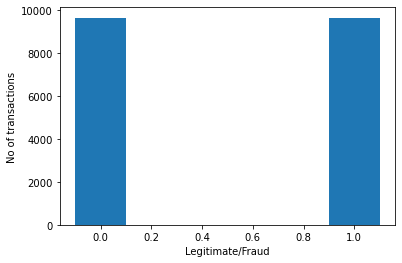

In [20]:
# Check class distribution

plt.bar(data['is_fraud'].unique(),data['is_fraud'].value_counts(),width = 0.2)

plt.xlabel('Legitimate/Fraud')

plt.ylabel('No of transactions')

plt.show()

In [21]:
# Encoding categorical data

le = LabelEncoder()

data['merchant'] = le.fit_transform(data['merchant'])

data['category'] = le.fit_transform(data['category'])

data['city'] = le.fit_transform(data['city'])

data['state'] = le.fit_transform(data['state'])

In [22]:
# All the features are numerical

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19302 entries, 358388 to 517571
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      19302 non-null  int64  
 1   merchant    19302 non-null  int32  
 2   category    19302 non-null  int32  
 3   amt         19302 non-null  float64
 4   city        19302 non-null  int32  
 5   state       19302 non-null  int32  
 6   zip         19302 non-null  int64  
 7   lat         19302 non-null  float64
 8   long        19302 non-null  float64
 9   city_pop    19302 non-null  int64  
 10  unix_time   19302 non-null  int64  
 11  merch_lat   19302 non-null  float64
 12  merch_long  19302 non-null  float64
 13  is_fraud    19302 non-null  int64  
dtypes: float64(5), int32(4), int64(5)
memory usage: 1.9 MB


In [23]:
# Separating the target feature

x_data = data.iloc[:,:-1].values

y_data = data.iloc[:,-1].values

In [24]:
# Split the data for training and testing

# We shuffle the data before splitting so that the model is trained on both fraud & legitimate transactions

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=42,shuffle=True)

#### Model Training

#### Logistic Regression

In [25]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [26]:
log_pred = log_reg.predict(x_train)

print("Accuracy score: ",round(accuracy_score(y_train,log_pred),3))

print("Classification report:\n",classification_report(y_train,log_pred))

Accuracy score:  0.5
Classification report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      6756
           1       0.00      0.00      0.00      6755

    accuracy                           0.50     13511
   macro avg       0.25      0.50      0.33     13511
weighted avg       0.25      0.50      0.33     13511



#### Decision Tree

In [27]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
dt_pred = dt.predict(x_train)

print("Accuracy score: ",round(accuracy_score(y_train,dt_pred),3))

print("Classification report:\n",classification_report(y_train,dt_pred))

Accuracy score:  1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6756
           1       1.00      1.00      1.00      6755

    accuracy                           1.00     13511
   macro avg       1.00      1.00      1.00     13511
weighted avg       1.00      1.00      1.00     13511



#### Random Forest Classifier

In [29]:
rfc = RandomForestClassifier(n_estimators = 50)

rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [30]:
rfc_pred = rfc.predict(x_train)

print("Accuracy score: ",round(accuracy_score(y_train,rfc_pred),3))

print("Classification report:\n",classification_report(y_train,rfc_pred))

Accuracy score:  1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6756
           1       1.00      1.00      1.00      6755

    accuracy                           1.00     13511
   macro avg       1.00      1.00      1.00     13511
weighted avg       1.00      1.00      1.00     13511



#### Both Decision Tree & Random Forest classifier is overfitting the data. Hence, we'll have to make predictions using Logistic Regression

#### Prediction

In [31]:
test_pred = log_reg.predict(x_test)

print("Accuracy score: ",round(accuracy_score(y_test,test_pred),3))

print("Classification report:\n",classification_report(y_test,test_pred))

Accuracy score:  0.5
Classification report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      2895
           1       0.00      0.00      0.00      2896

    accuracy                           0.50      5791
   macro avg       0.25      0.50      0.33      5791
weighted avg       0.25      0.50      0.33      5791



#### Our model detects fraudulent transactions with an accuracy of 50%